# Pseudo 3D - Willington
Comparing pseudo 3D and actual 3D inversion results for an example with minimal topography variations.
This example shows in cases where survey grid is simple, pseudo 3D and full 3D inversion bear very similar results whilst pseudo 3D runs in a matter of minutes compared to full 3D inversion which can take up to a few hours. Pseudo 3D benefits from parallel inversion capabilities of ResIPy in batch inversion.

- [ ] createMesh outputs too many stuff even if show_output=False
- [ ] import for createpseudo3D is done twice! not good, just create new instance and copy over data
- [ ] saveProject doesn't properly save pseudo3D survey

In [1]:
import sys
sys.path.append('../src')
from resipy import Project
import pyvista as pv
import time
timings = {}

API path =  E:\ForGit\resipy\src\resipy
ResIPy version =  3.3.2
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


<b><font color='red'>Pseudo 3D:</b>

In [2]:
t0 = time.time()
k = Project(typ='R2')

Working directory is: E:\ForGit\resipy\src\resipy


F:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
k.createPseudo3DSurvey(r'E:\OneDrive - University of Oklahoma\Rutgers Google Drive\pyR2\paper 3D\Pseudo 3D Willington\Willington\Raw_data', 
                       lineSpacing=20, ftype='Sting')

32/32 imported
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X00
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X06
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X12
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X18
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X24
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X30
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X36
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X42
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X48
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X54
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X60
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X66
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X72
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X78
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X84
Working directory is: E:\ForGit\resipy\src\resipy\invdir\X90
Working d

In [5]:
k.importPseudo3DElec(r'E:\OneDrive - University of Oklahoma\Rutgers Google Drive\pyR2\paper 3D\Pseudo 3D Willington\Willington\electrodes3D.csv')

In [6]:
k.createMultiMesh(typ='trian', show_output=False, dump=None, runParallel=True)

F:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Creating triangular mesh...done (2487 elements)
Creating triangular mesh...done (2493 elements)
Creating triangular mesh...done (2499 elements)
Creating triangular mesh...done (2515 elements)
Creating triangular mesh...done (2497 elements)
Creating triangular mesh...done (2503 elements)
Creating triangular mesh...done (2499 elements)
Creating triangular mesh...done (2499 elements)
Creating triangular mesh...done (2493 elements)
Creating triangular mesh...done (2511 elements)
Creating triangular mesh...done (2548 elements)
Creating triangular mesh...done (2590 elements)
Creating triangular mesh...done (2619 elements)
Creating triangular mesh...done (2604 elements)
Creating triangular mesh...done (2667 elements)
Creating triangular mesh...done (2587 elements)
Creating triangular mesh...done (3279 elements)
Creating triangular mesh...done (3281 elements)
Creating triangular mesh...done (3281 elements)
Creating triangular mesh...done (3285 elements)
Creating triangular mesh...done (2491 el

F:\Anaconda\lib\site-packages\vtkmodules\util\numpy_support.py:74: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  _vtk_np = {vtkConstants.VTK_BIT:numpy.bool,
F:\Anaconda\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


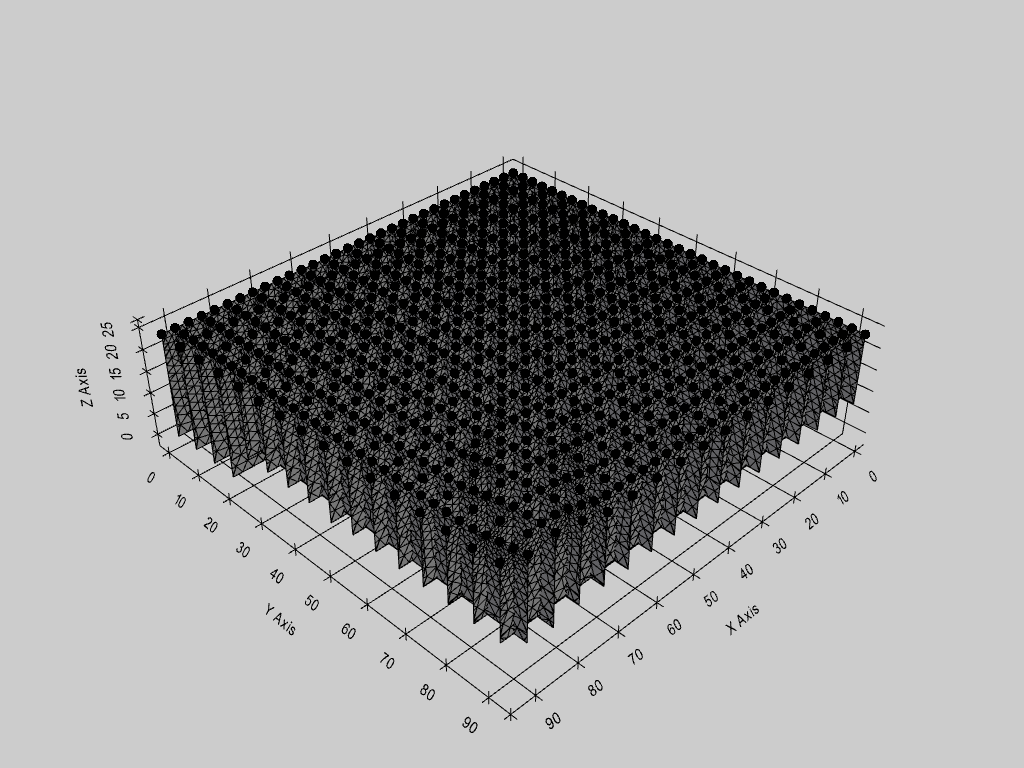

In [7]:
k.showPseudo3DMesh(cropMesh=True)

In [8]:
k.param['b_wgt'] = 0.05
k.invertPseudo3D(runParallel=True)

Writing .in file and protocol.dat for X00 survey... done
Writing .in file and protocol.dat for X06 survey... done
Writing .in file and protocol.dat for X12 survey... done
Writing .in file and protocol.dat for X18 survey... done
Writing .in file and protocol.dat for X24 survey... done
Writing .in file and protocol.dat for X30 survey... done
Writing .in file and protocol.dat for X36 survey... done
Writing .in file and protocol.dat for X42 survey... done
Writing .in file and protocol.dat for X48 survey... done
Writing .in file and protocol.dat for X54 survey... done
Writing .in file and protocol.dat for X60 survey... done
Writing .in file and protocol.dat for X66 survey... done
Writing .in file and protocol.dat for X72 survey... done
Writing .in file and protocol.dat for X78 survey... done
Writing .in file and protocol.dat for X84 survey... done
Writing .in file and protocol.dat for X90 survey... done
Writing .in file and protocol.dat for Y00 survey... done
Writing .in file and protocol.d

F:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
F:\Anaconda\lib\site-packages\vtkmodules\util\numpy_support.py:74: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  _vtk_np = {vtkConstants.VTK_BIT:numpy.bool,
F:\Anaconda\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.

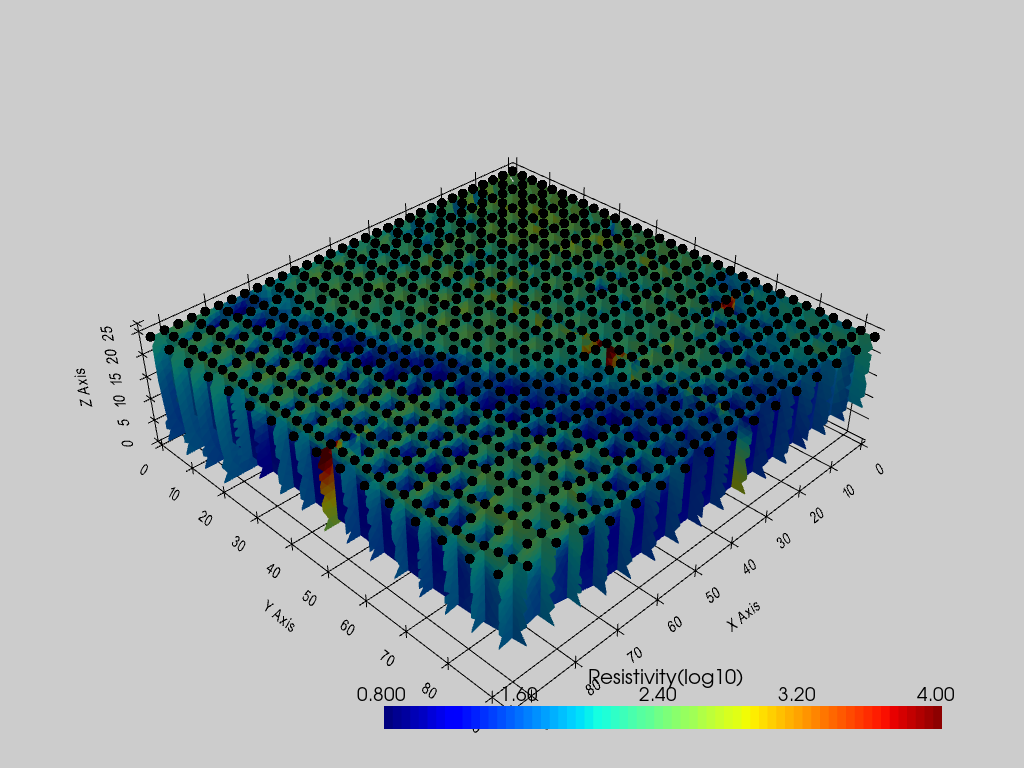

In [9]:
k.showResults(index=-1, cropMesh=True, color_map='jet', vmin=0.8, vmax=4)
timings['Pseudo 3D'] = time.time() - t0

In [10]:
k.saveProject(r'E:\OneDrive - University of Oklahoma\Rutgers Google Drive\pyR2\paper 3D\Pseudo 3D Willington\Saved Projects\JN_Pseudo3D_Willington.resipy')

<b><font color='red'>Full 3D:</b>

In [11]:
t1 = time.time()
m = Project(typ='R3t')

Working directory is: E:\ForGit\resipy\src\resipy
clearing dirname


In [12]:
m.create3DSurvey(r'E:\OneDrive - University of Oklahoma\Rutgers Google Drive\pyR2\paper 3D\Pseudo 3D Willington\Willington\Raw_data', 
                 lineSpacing=20, ftype='Sting')

712/712 reciprocal measurements found.
18 measurements error > 20 %
712/712 reciprocal measurements found.
60 measurements error > 20 %
712/712 reciprocal measurements found.
56 measurements error > 20 %
712/712 reciprocal measurements found.
8 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
32 measurements error > 20 %
602/657 reciprocal measurements found.
34 measurements error > 20 %
712/712 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
12 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
680/696 reciprocal measurements found.
10 measurements e

In [13]:
m.importElec(r'E:\OneDrive - University of Oklahoma\Rutgers Google Drive\pyR2\paper 3D\Pseudo 3D Willington\Willington\electrodes3D.csv')

Merging electrodes positionned at the same location.


Creating tetrahedral mesh...done (107329 elements)


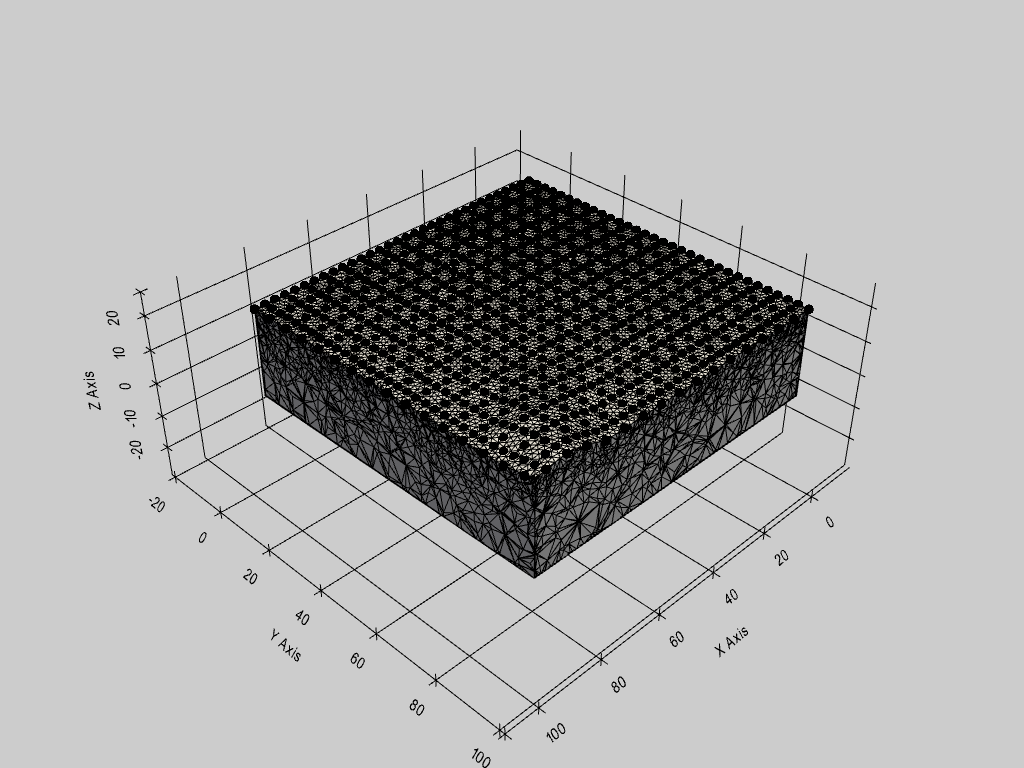

In [14]:
m.createMesh(typ='tetra', fmd=25, cl_factor=4, cl=1.5)
m.showMesh()

In [15]:
m.param['b_wgt'] = 0.05
def dump(x):
    pass
m.invert(dump=dump)

1/1 results parsed (1 ok; 0 failed)


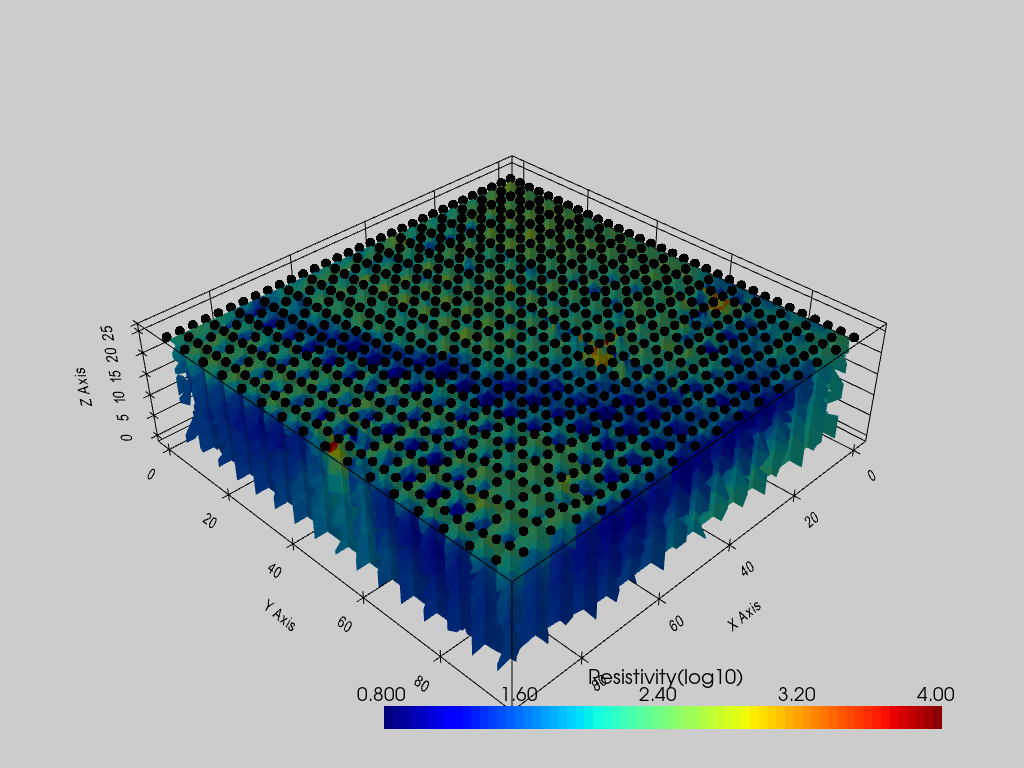

In [16]:
m.showResults(color_map='jet', vmin=0.8, vmax=4, pvslices=([1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           [1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           []))
timings['Full 3D'] = time.time() - t1

In [17]:
m.saveProject(r'E:\OneDrive - University of Oklahoma\Rutgers Google Drive\pyR2\paper 3D\Pseudo 3D Willington\Saved Projects\JN_Full3D_Willington.resipy')

# <b><i><font color='blue'>Timings:</i></b>

In [18]:
for key in timings.keys():
    print('{:s} : {:.2f}s'.format(key, timings[key]))

Pseudo 3D : 282.30s
Full 3D : 14916.06s


# Direct comparizon of Pseudo 3D and Full 3D results:
Clearly the results of both approaches are very similar. With Pseudo 3D approach being 18 times faster on this particular machine (AMD64 Family 23 Model 8 Stepping 2, AuthenticAMD, 16 Threads at <= 3700.0 Mhz, Total memory = 31.9 Gb)

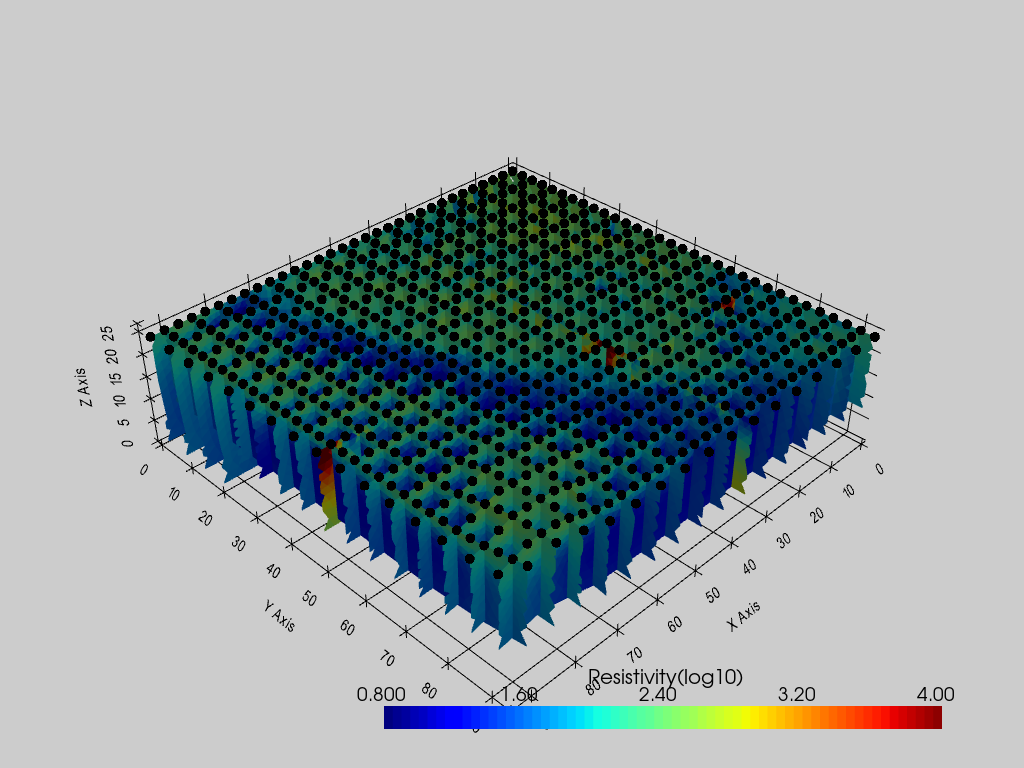

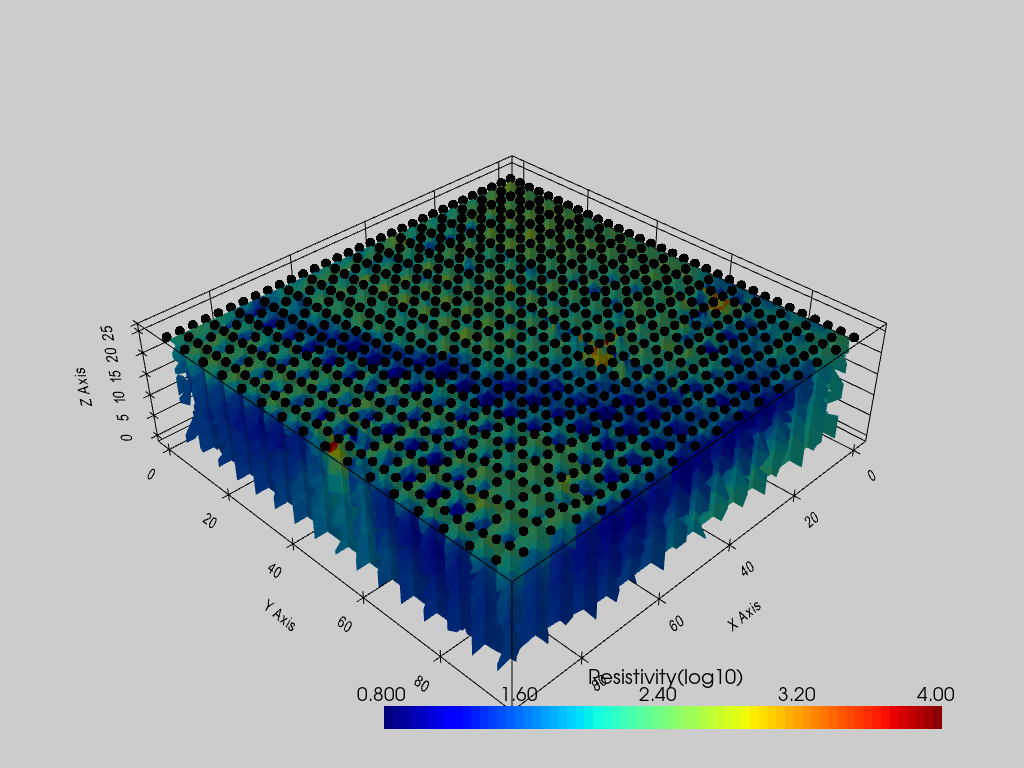

In [19]:
k.showResults(index=-1, cropMesh=True, color_map='jet', vmin=0.8, vmax=4)
m.showResults(color_map='jet', vmin=0.8, vmax=4, pvslices=([1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           [1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           []))

## Paper figure

In [20]:
%load_ext autoreload
%autoreload 2

In [21]:
kpseudo = Project(typ='R3t')
kpseudo.loadProject(r'E:\OneDrive - University of Oklahoma\Rutgers Google Drive\pyR2\paper 3D\Pseudo 3D Willington\Saved Projects\JN_Pseudo3D_Willington.resipy')
# error on darkmode not in settings

kfull = Project(typ='R3t')
kfull.loadProject(r'E:\OneDrive - University of Oklahoma\Rutgers Google Drive\pyR2\paper 3D\Pseudo 3D Willington\Saved Projects\JN_Full3D_Willington.resipy')

Working directory is: E:\ForGit\resipy\src\resipy
clearing dirname
712/712 reciprocal measurements found.
18 measurements error > 20 %
712/712 reciprocal measurements found.
60 measurements error > 20 %
712/712 reciprocal measurements found.
56 measurements error > 20 %
712/712 reciprocal measurements found.
8 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
32 measurements error > 20 %
602/657 reciprocal measurements found.
34 measurements error > 20 %
712/712 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
12 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements er

F:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
F:\Anaconda\lib\site-packages\vtkmodules\util\numpy_support.py:74: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  _vtk_np = {vtkConstants.VTK_BIT:numpy.bool,
F:\Anaconda\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.

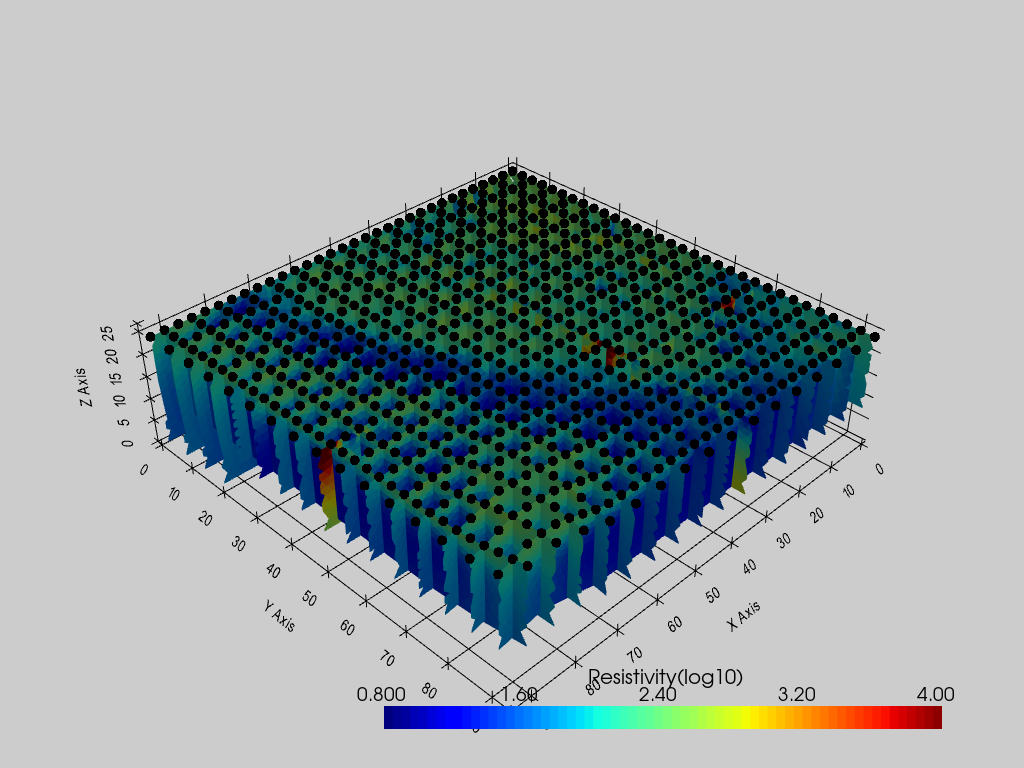

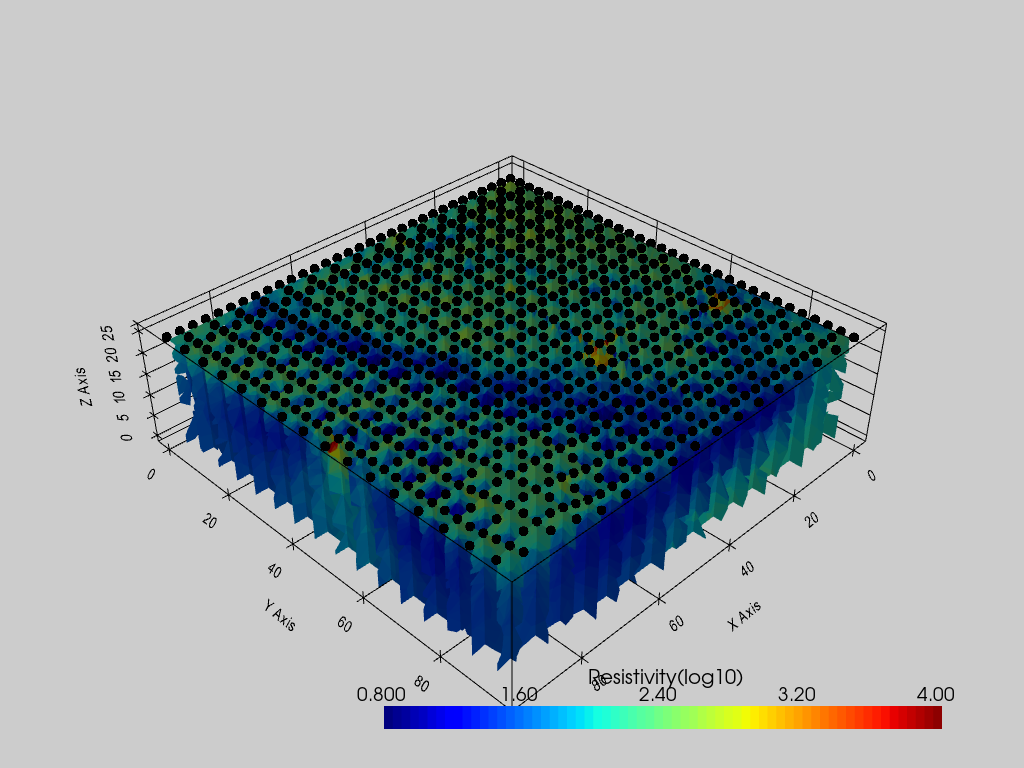

In [22]:
kpseudo.showResults(index=-1, attr='Resistivity(log10)', cropMesh=True, color_map='jet', vmin=0.8, vmax=4)
kfull.showResults(color_map='jet', vmin=0.8, vmax=4, pvslices=([1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           [1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           []))

In [23]:
kpseudo.meshResults[0].df.columns

Index(['param', 'elm_id', 'region', 'cellType', 'X', 'Y', 'Z',
       'Resistivity(ohm.m)', 'Resistivity(log10)', 'Sensitivity(log10)',
       'Conductivity(mS/m)'],
      dtype='object')

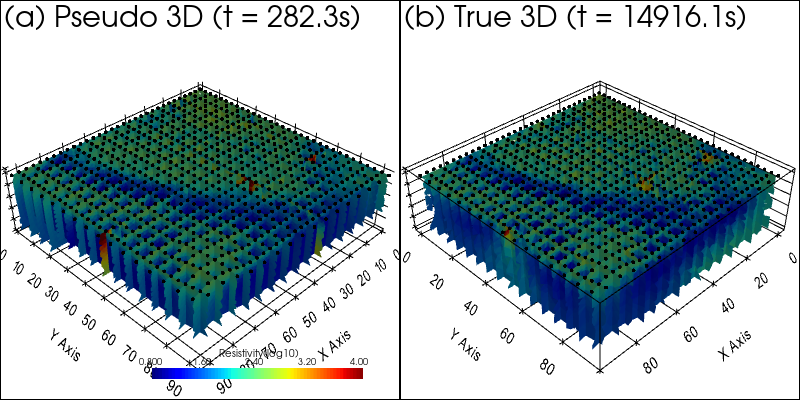

In [29]:
pl = pv.Plotter(shape=(1,2), window_size=[800, 400])
pl.subplot(0,0)
pl.add_text('(a) Pseudo 3D (t = {:.1f}s)'.format(timings['Pseudo 3D']) , color='k')
kpseudo.showResults(ax=pl, index=-1, cropMesh=True, color_map='jet',
                    vmin=0.8, vmax=4, pvshow=False, background_color=(1,1,1))
pl.subplot(0,1)
pl.add_text('(b) True 3D (t = {:.1f}s)'.format(timings['Full 3D']), color='k')
kfull.showResults(ax=pl, color_map='jet', vmin=0.8, vmax=4, pvshow=False,
                  pvslices=([1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                            [1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                            []), background_color=(1,1,1))
pl.show()

In [25]:
# trick to save a high resolution screenshot (basically render off screen)
# need to be executed before pl.show() so that the Plotter is not closed
hsize = 2000
pl.ren_win.OffScreenRenderingOn()
pl.enable_anti_aliasing()
pl.screenshot('../src/image/paper3d/mesh-types.jpg', transparent_background=True,
              window_size=[hsize, int(hsize*pl.window_size[1]/pl.window_size[0])])
pl.ren_win.SetSize([1000, 800])
pl.ren_win.OffScreenRenderingOff()
pl.ren_win.Render()
# NOTE pl.show() doesn't work after that

AttributeError: 'Plotter' object has no attribute 'ren_win'